<a href="https://colab.research.google.com/github/Murcha1990/churn_clients/blob/main/Raiff_demo_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задачи классификации

* загрузка данных и их анализ
* обучение и валидация модели
* интерпретация результатов модели
* сохранение экспериментов

Мы будем активно пользоваться следующими библиотеками Python:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Matplotlib - для визуализации данных
*   Sklearn - библиотеки с основными инструментами ML

С функционалом этих библиотек разберемся в процессе прохождения курса.

Посмотрим, как пользоваться логистической регрессией в python для решения задач классификации.

Будем решать задачу определения оттоковых клиентов,  а именно, *по характеристикам клиентов некоторого банка будем определять, собираются ли клиенты сменить банк или нет*.

**Наши цели на сегодня**

*  Обучить логистическую регрессию на представленном датасете.
*  Оценить качество полученной модели и сравнить с методом ближайших соседей.

## Загрузка данных и их первичный анализ

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [105]:
data = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/churn_clients/main/ClientsData.csv")

data.shape

(15223, 10)

Посмотрим на данные.

Описание данных клиентов:
- AGE	— возраст клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- PERSONAL_INCOME — личный доход клиента (в рублях);
- Complaints — количество обращений в службу поддержки банка;
- Answers — количество вопросов, не решенных службой поддержки;

- TARGET — целевая переменная: собирается ли клиент сменить банк (1 — да, 0 — нет).




In [106]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,TARGET,Complaints,Answers
0,49,1,0,1,2,1,5000.0,0,1,1
1,32,1,0,1,3,3,12000.0,0,1,1
2,52,1,0,1,4,0,9000.0,0,2,1
3,39,1,0,1,1,1,25000.0,0,1,1
4,30,1,0,0,0,0,12000.0,0,2,1


Посмотрим, есть ли в данных пропущенные значения.

In [107]:
data.isna().sum()

AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
TARGET               0
Complaints           0
Answers              0
dtype: int64

Посмотрим на распределение некоторых признаков и целевой переменной.

(array([1552., 2266., 1812., 2082., 1477., 1712., 1737., 1201., 1058.,
         326.]),
 array([21. , 25.6, 30.2, 34.8, 39.4, 44. , 48.6, 53.2, 57.8, 62.4, 67. ]),
 <a list of 10 Patch objects>)

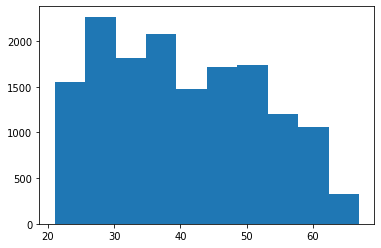

In [111]:
plt.hist(data['AGE'])

(array([1.4207e+04, 9.6000e+02, 3.7000e+01, 1.1000e+01, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([2.400000e+01, 2.502160e+04, 5.001920e+04, 7.501680e+04,
        1.000144e+05, 1.250120e+05, 1.500096e+05, 1.750072e+05,
        2.000048e+05, 2.250024e+05, 2.500000e+05]),
 <a list of 10 Patch objects>)

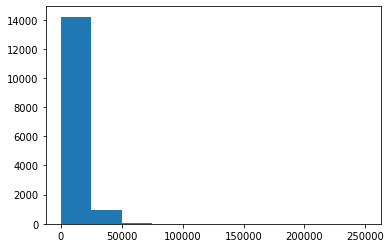

In [117]:
plt.hist(data['PERSONAL_INCOME'])

(array([7.900e+02, 5.921e+03, 4.318e+03, 2.266e+03, 9.120e+02, 5.330e+02,
        1.860e+02, 1.340e+02, 3.800e+01, 6.900e+01, 1.100e+01, 1.600e+01,
        1.000e+00, 5.000e+00, 4.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([2.4000000e+01, 5.0235200e+03, 1.0023040e+04, 1.5022560e+04,
        2.0022080e+04, 2.5021600e+04, 3.0021120e+04, 3.5020640e+04,
        4.0020160e+04, 4.5019680e+04, 5.0019200e+04, 5.5018720e+04,
        6.0018240e+04, 6.5017760e+04, 7.0017280e+04, 7.5016800e+04,
        8.0016320e+04, 8.5015840e+04, 9.0015360e+04, 9.5014880e+04,
        1.0001440e+05, 1.0501392e+05

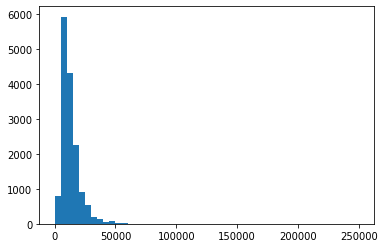

In [118]:
plt.hist(data['PERSONAL_INCOME'], bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f347ff16a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f347fea4100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f347ff166a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f347fea47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f347fea4ac0>],
 'means': []}

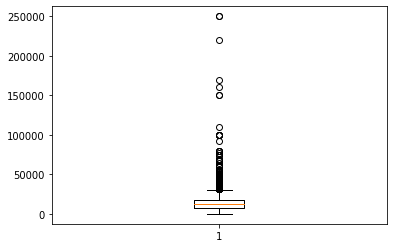

In [116]:
plt.boxplot(data['PERSONAL_INCOME'])

(array([13411.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1812.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

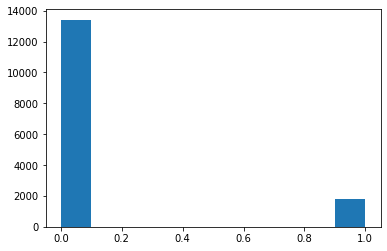

In [115]:
plt.hist(data['TARGET'])

Что можно заметить:

* возраст распределен более-менее равномерно
* есть небольшая группа людей с большими доходами, доходы распределены неравномерно (и даже не нормально)
* целевая переменная сильно несбалансирована

## Обучение и валидация модели

Сформируем матрицу X объект-признак и вектор y целевой переменной.

In [76]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

Для решения этой задачи будем использовать **линейную модель классификации — логистическую регрессию**.

Для начала разобъём данные на train и test (test — 20% от всех данных).

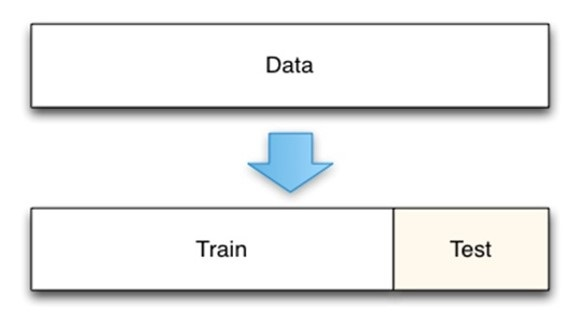

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрим на основные характеристики признаков.

In [78]:
X.describe()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,Complaints,Answers
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,40.406096,0.909610,0.134468,0.654536,1.099389,0.645208,13853.836323,1.387769,0.751889
std,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.793566,0.988499
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


## Вопрос для Quiz

В одинаковых ли масштабах измеряются признаки клиентов?

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,Complaints,Answers
0,0.735974,0.317749,-0.395161,0.727742,-1.108903,-0.79471,-0.652688,4.527396,3.281398
1,0.050067,0.317749,-0.395161,0.727742,-1.108903,-0.79471,-0.990101,-0.490981,-0.762613
2,-0.550101,0.317749,-0.395161,0.727742,-1.108903,-0.79471,0.134611,0.763613,1.259392
3,-0.464363,0.317749,-0.395161,-1.374113,0.900995,1.66016,1.934152,-0.490981,-0.762613
4,0.135806,0.317749,-0.395161,-1.374113,0.900995,1.66016,0.809439,-0.490981,-0.762613


Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [80]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [81]:
pred_test = model.predict(Xtest) # предсказание классов

Посмотрим на предсказания модели и оценим ее качество.

In [82]:
pred_test[:5]

array([0, 0, 0, 0, 0])

In [83]:
accuracy_score(ytest, pred_test)

0.8791382028376248

## Вопрос для Quiz

Доля верно определенных классов высокая! Значит ли это, что качество хорошее?


Проверим, сбалансирована ли выборка.

In [84]:
y.value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

Баланса классов нет: большинство клиентов не собирается менять банк (y=0). 

Посмотрим, что предсказывает модель.

In [85]:
pred_test[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Посмотрим на матрицу ошибок.

In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest, pred_test)

array([[3346,    2],
       [ 458,    0]])

In [87]:
from sklearn.metrics import recall_score

recall_score(ytest, pred_test)

0.0

Модель верно не определила ни одного оттокового клиента :(

Давайте разберемся, почему так произошло?

Посмотрим на вероятности, выдаваемые моделью.

In [88]:
probs = model.predict_proba(Xtest)

probs[:10]

array([[0.74792386, 0.25207614],
       [0.91263782, 0.08736218],
       [0.85376016, 0.14623984],
       [0.84332411, 0.15667589],
       [0.84902   , 0.15098   ],
       [0.90377594, 0.09622406],
       [0.87595062, 0.12404938],
       [0.86171898, 0.13828102],
       [0.83460356, 0.16539644],
       [0.89310686, 0.10689314]])

Модель слишком позитивна. Она присваивает классу 0 (клиент не уйдет) всегда большие вероятности. 

Попробуем изменить порог для перевода вероятности в классы со стандартного 0.5 на порог поменьше.

In [89]:
probs_churn = probs[:,1]

classes = probs_churn > 0.12

In [90]:
confusion_matrix(ytest, classes)

array([[1893, 1455],
       [ 163,  295]])

In [91]:
recall_score(ytest, classes)

0.6441048034934498

Теперь модель стала находить оттоковых клиентов, но и больше ошибается на тех клиентах, которые не уйдут.

## Вопрос для Quiz

Вычислите accuracy на новых классах (сравните ytest с classes)

In [92]:
# ваш код здесь

accuracy_score(ytest, classes)

0.5748817656332107

## Интерпретация модели

Посмотрим на веса модели.

In [93]:
model.coef_, model.intercept_

(array([[-0.27357381,  0.15056766, -0.05266394,  0.01489557,  0.082133  ,
          0.00291138,  0.23150349,  0.27551808, -0.44179942]]),
 array([-2.10802664]))

In [94]:
import pandas as pd

coef_table = pd.DataFrame({'features' : list(X.columns), 'weights' : list(model.coef_[0])})

coef_table.sort_values(by='weights')

,features,weights
8,Answers,-0.441799
0,AGE,-0.273574
2,SOCSTATUS_PENS_FL,-0.052664
5,DEPENDANTS,0.002911
3,GENDER,0.014896
4,CHILD_TOTAL,0.082133
1,SOCSTATUS_WORK_FL,0.150568
6,PERSONAL_INCOME,0.231503
7,Complaints,0.275518


Если вес у признака положительный, то признак вносит положительный вклад в ответ, то есть чем больше значение признака, тем больше это дает вклад в положительный класс объекта и наоборот.

## Метод ближайших соседей

Существует еще один простой метод для решения задач классификации - метод ближайших соседей.

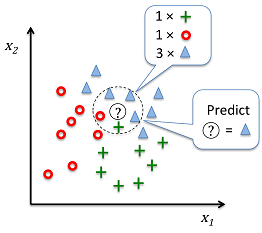

Попробуем применить метод ближайших соседей для решения поставленной задачи.

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [101]:
knn.fit(Xtrain, ytrain)

pred_test2 = knn.predict_proba(Xtest)[:,1]

confusion_matrix(ytest, pred_test2 > 0.12)

array([[1928, 1420],
       [ 214,  244]])

## Вопрос для Quiz

Вычислите recall (долю найденных моделью оттоковых клиентов)

## Сохранение результатов экспериментов

**Вариант 1:** скачать ноутбук, сохранить локально

**Вариант 2:** скачать ноутбук, сохранить локально, загрузить обновленную версию на GitHub

**Вариант 3:** воспользоваться [расширением Google Chrome](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo), которое позволяет сохранить ноутбук на GitHub напрямую из Google Colab.